In [1]:
'''
DSC530 Final Project
Matthew Fikes
2/17/2021

'''

'\nDSC530 Final Project\nMatthew Fikes\n2/17/2021\n\n'

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import thinkstats2
import thinkplot
from matplotlib import pyplot as plt
import statistics
import statsmodels.api as sm



In [3]:
#LOAD IN DATA

# Institutional characteristics data and subset of needed columns
inst_raw = pd.read_csv('C:/Users/mfikes/Desktop/Bellevue/DSC530/Final Project/data/hd2018.csv')
inst_data = inst_raw[['UNITID','OBEREG','HDEGOFR1']]

# IPEDS Instructional Salary data and and subset of needed columns
is_raw = pd.read_csv('C:/Users/mfikes/Desktop/Bellevue/DSC530/Final Project/data/IPEDS/Inst Salary/sal2018_is.csv')
is_data = is_raw[['UNITID','SAINSTT','SAOUTLT']]
is_data = is_data.rename(columns = {'SAINSTT':'IS_TOTAL','SAOUTLT':'IS_SALARY'})

# IPEDS Non-Instructional Salary data and subset of needed columns
nis_raw = pd.read_csv('C:/Users/mfikes/Desktop/Bellevue/DSC530/Final Project/data/IPEDS/Inst Salary/sal2018_nis.csv')
nis_data = nis_raw[['UNITID','SANIN01','SANIT01','SANIN04','SANIT04']]
nis_data = nis_data.rename(columns = {'SANIN01':'NIS_TOTAL','SANIT01':'NIS_SALARY','SANIN04':'NIS_ED_TOTAL','SANIT04':'NIS_ED_SALARY'})

# IPEDS Completion data and and subset of needed columns
comp_raw = pd.read_csv('C:/Users/mfikes/Desktop/Bellevue/DSC530/Final Project/data/IPEDS/Completion/c2019_c.csv')
comp_data = comp_raw[['UNITID','CSTOTLT']]
comp_data = comp_data.rename(columns={'CSTOTLT':'COMPS_TOTAL'})
#group data together, otherwise UNITID is split by instructor academic ranks
comp_data = comp_data.groupby('UNITID').sum()

# join Instructional and Non-Instructional sets
j1 = is_data.set_index('UNITID').join(nis_data.set_index('UNITID'))

# sum columns, combining instructor ranks
j1 = j1.groupby('UNITID').sum()

# join together
j2 = pd.merge(j1, comp_data, left_index=True, right_index=True)
final_data = pd.merge(j2, inst_data, left_index=True, right_on='UNITID')

# replace zero with NA


# set type for catergory variables
final_data['OBEREG'] = final_data['OBEREG'].astype('category')
final_data['HDEGOFR1'] = final_data['HDEGOFR1'].astype('category')
salary_cols = ['IS_SALARY','NIS_SALARY']
final_data['TOTAL_SALARY'] = final_data[salary_cols].sum(axis=1)
final_data['MEAN_IS_SALARY'] = final_data['IS_SALARY']/final_data['IS_TOTAL']
final_data['MEAN_NIS_SALARY'] = final_data['NIS_SALARY']/final_data['NIS_TOTAL']
final_data['MEAN_ED_SALARY'] = final_data['NIS_ED_SALARY']/final_data['NIS_ED_TOTAL']
final_data = final_data.replace(0,np.nan)
final_data

,IS_TOTAL,IS_SALARY,NIS_TOTAL,NIS_SALARY,NIS_ED_TOTAL,NIS_ED_SALARY,COMPS_TOTAL,UNITID,OBEREG,HDEGOFR1,TOTAL_SALARY,MEAN_IS_SALARY,MEAN_NIS_SALARY,MEAN_ED_SALARY
0,518,35660956.0,3210.0,180208956.0,48.0,2472714.0,810,100654,5,12,2.158699e+08,68843.544402,56139.861682,51514.875000
1,1796,203008160.0,16630.0,973494490.0,800.0,44545605.0,5556,100663,5,11,1.176503e+09,113033.496659,58538.453999,55682.006250
2,66,3244990.0,140.0,9042230.0,50.0,2748145.0,172,100690,5,12,1.228722e+07,49166.515152,64587.357143,54962.900000
3,694,61186682.0,6000.0,407749170.0,84.0,3889884.0,1957,100706,5,11,4.689359e+08,88165.247839,67958.195000,46308.142857
4,454,35265524.0,3354.0,156428922.0,600.0,25210866.0,663,100724,5,11,1.916944e+08,77677.365639,46639.511628,42018.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6810,2,66400.0,6.0,176000.0,NaN,NaN,16,492704,9,13,2.424000e+05,33200.000000,29333.333333,NaN
6811,12,562080.0,24.0,1180188.0,10.0,448354.0,97,492722,6,40,1.742268e+06,46840.000000,49174.500000,44835.400000
6819,14,869164.0,165.0,6045595.0,120.0,4388320.0,453,492801,4,30,6.914759e+06,62083.142857,36639.969697,36569.333333
6852,8,287672.0,8.0,394782.0,NaN,NaN,48,493424,3,40,6.824540e+05,35959.000000,49347.750000,NaN


In [4]:
# function to calculate tails
def tails(hist):

    for var, value in hist.Smallest(10):
        print('Smallest:',var,value)
    for var, value in hist.Largest(10):
        print('Largest:',var,value)
    

In [5]:
# function for requested statistics
def StatResults(data):
    for i in len(data):
        if data[i] == 'UNITID':
            continue
        print(i)        
        print('Mean:\n',np.mean(data[i]))
        print('Mode:\n',data[i].mode().values)
        print('Spread:\n',np.var(data[i]))
        print()
        print('\n')


In [6]:
# leave out these from histograms
excluded_cols = ['UNITID','OBEREG','HDEGOFR1']


def gen_hists(data,exclusions):
    
    #thinkplot.PrePlot(13, rows= 9, cols = 2)
    for i in data:
       
        # leave out excluded columns
        if i in exclusions:
            continue 
        
        #Set num of bins to square root of length of dataframe
        bins = (np.sqrt(len(final_data[i]))).astype(int)
        
        
        
    # MAKE HISTOGRAMS        
       
        # Base histogram, no transformations, unbinned
        hist0 = thinkstats2.Hist(data[i].dropna().values)
        
        # Base histogram, no transformations
        #hist = thinkstats2.Hist(pd.cut(data[i].dropna().values,bins=bins,labels=False, duplicates='drop'))
        hist = thinkstats2.Hist(pd.cut(data[i].dropna().values,bins=bins, labels=False, duplicates='drop'))
        
        # Histogram with Cubed Root Transformation
        hist2 = thinkstats2.Hist(pd.cut(data[i].dropna().values** (1. / 3), labels=False, bins=bins, duplicates='drop'))
        
        # Histogram with Square Root Transformation
        hist3 = thinkstats2.Hist(pd.cut(np.sqrt(final_data[i].dropna().values), labels=False, bins=bins, duplicates='drop'))
        
        # Histogram with log Transformation
        hist4 = thinkstats2.Hist(pd.cut(np.log(final_data[i].dropna().values), labels=False, bins=bins, duplicates='drop'))
        
        #find tails based on unbinned data
        #tails(hist0)
        
# PLOT HISTOGRAMS

        
        
        # base histogram
        #plt.figure(figsize=(13,6))
         
        plt.figure(figsize=(13,5))
        # = plt.hist(data[i].dropna())
        
        thinkplot.Hist(hist,color='black',label='untransformed data',alpha=0.4)
        #plt.xticks(hist.bins)
        plt.xlabel('value')
        plt.ylabel('freq')
        
        
        # 3 log histograms
        
        thinkplot.Hist(hist2,color='red',alpha=0.4,label='cube root')
        thinkplot.Hist(hist3,alpha=0.4,label='square root')
        thinkplot.Hist(hist4,color='green',alpha=0.4,label='log')
        
        plt.legend()
        plt.title(i)
    
        
        print(i)
        print('Mean:\n',np.mean(data[i]))
        print('Mode:\n',data[i].mode().values)
        print('Spread:\n',np.var(data[i]))
        print('\n')
        
        
        
        # base histogram
       
        plt.figure(figsize=(6,3))
        plt.subplot(1, 2, 1)
        
        thinkplot.Hist(hist,color='black',alpha=0.4)
       
         
        # 3 log histograms
        plt.subplot(1, 2,2)
        
        thinkplot.Hist(hist2,color='red',alpha=0.4)
        thinkplot.Hist(hist3,alpha=0.4)
        thinkplot.Hist(hist4,color='green',alpha=0.4)
        
        
  
        

IS_TOTAL
Mean:
 325.962840417409
Mode:
 [6]
Spread:
 364932.10246238066


IS_SALARY
Mean:
 29062043.586452764
Mode:
 [160000. 240000.]
Spread:
 4762759104709779.0


NIS_TOTAL
Mean:
 2184.0171136653894
Mode:
 [12.]
Spread:
 41667115.11669301


NIS_SALARY
Mean:
 137184909.71315452
Mode:
 [ 100000.  240000.  500000.  628000.  948440. 1140000.]
Spread:
 2.0566269023082285e+17


NIS_ED_TOTAL
Mean:
 219.22114853672005
Mode:
 [6.]
Spread:
 319043.1534677034


NIS_ED_SALARY
Mean:
 12093314.036443954
Mode:
 [90000.]
Spread:
 1192291855932913.8


COMPS_TOTAL
Mean:
 1201.1231865614661
Mode:
 [66]
Spread:
 4882464.0596532775


TOTAL_SALARY
Mean:
 165743335.8847035
Mode:
 [ 242400. 1528000. 1866000. 2446000.]
Spread:
 2.6823334958901734e+17


MEAN_IS_SALARY
Mean:
 68895.1781134893
Mode:
 [40000.]
Spread:
 553564616.1951375


MEAN_NIS_SALARY
Mean:
 55146.4453537939
Mode:
 [40000. 50000.]
Spread:
 175502280.32359636




<ipython-input-6-9a104f01489b>:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,5))


MEAN_ED_SALARY
Mean:
 49496.22883152884
Mode:
 [45000.]
Spread:
 231332128.66771415




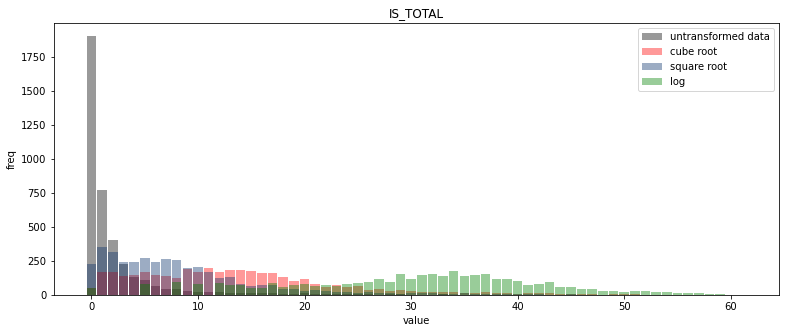

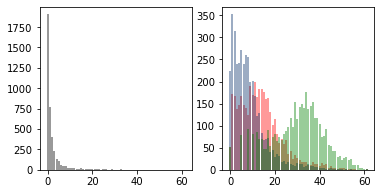

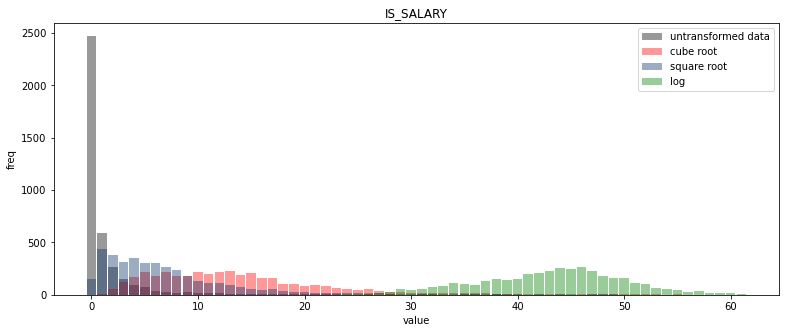

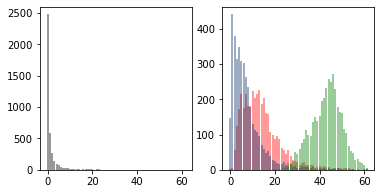

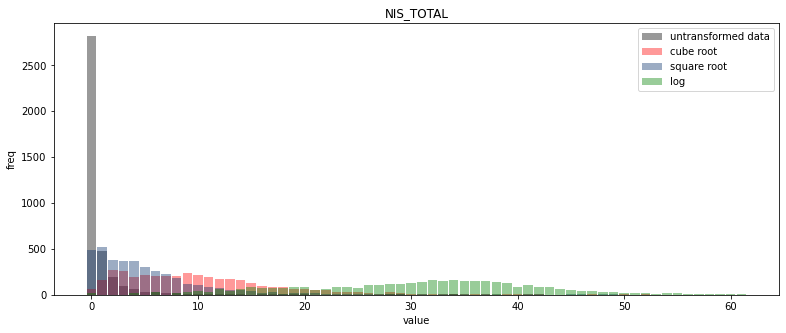

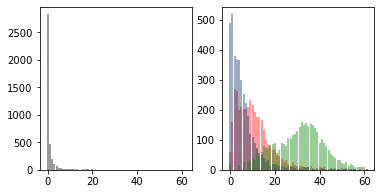

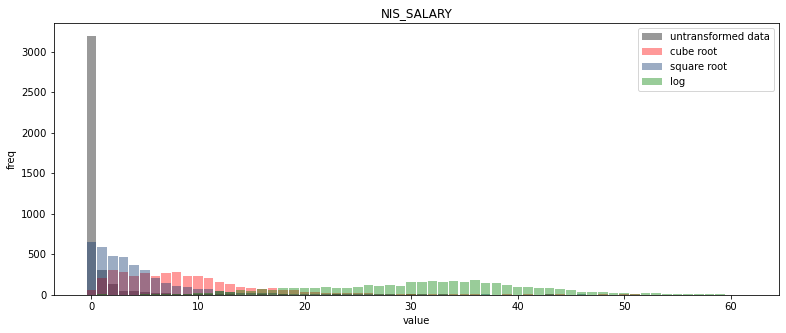

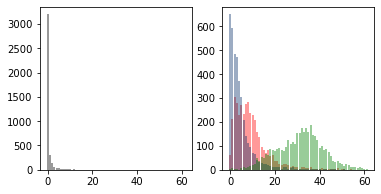

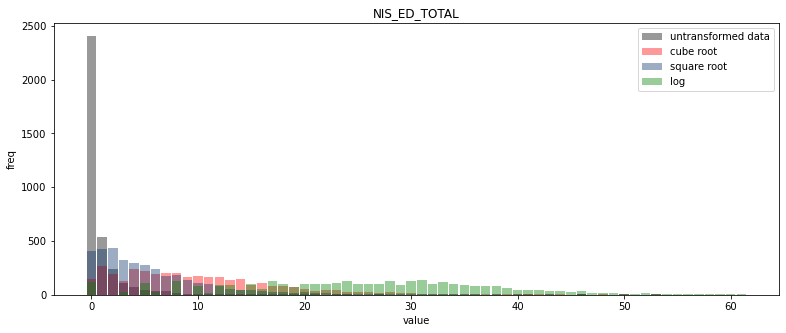

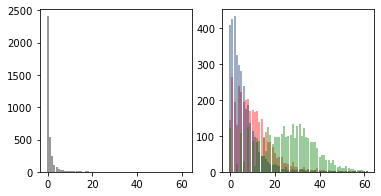

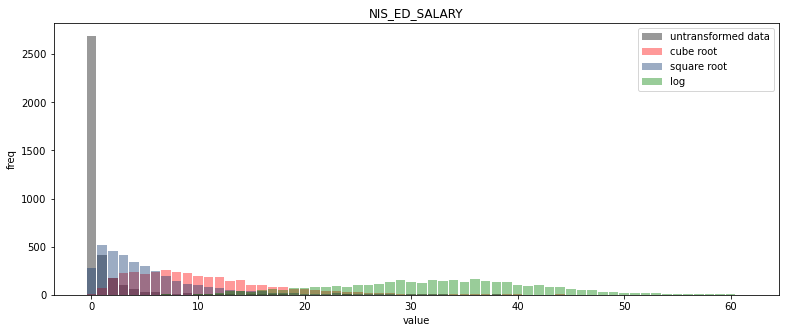

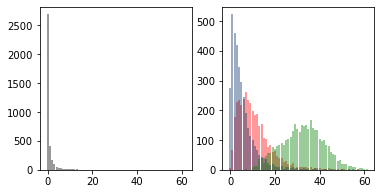

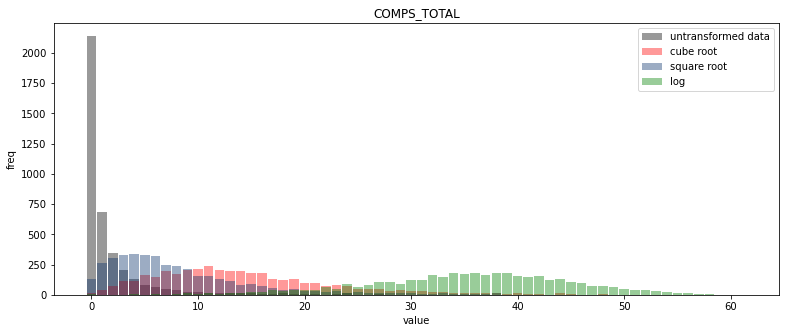

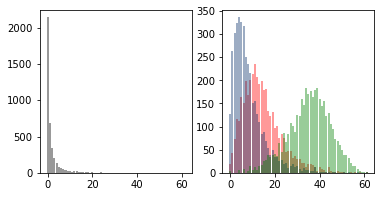

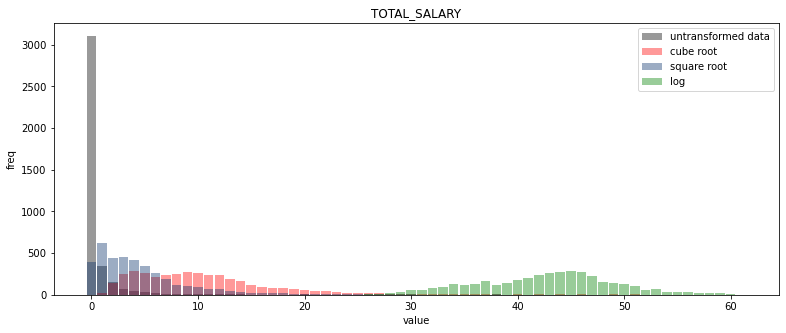

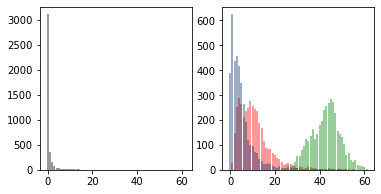

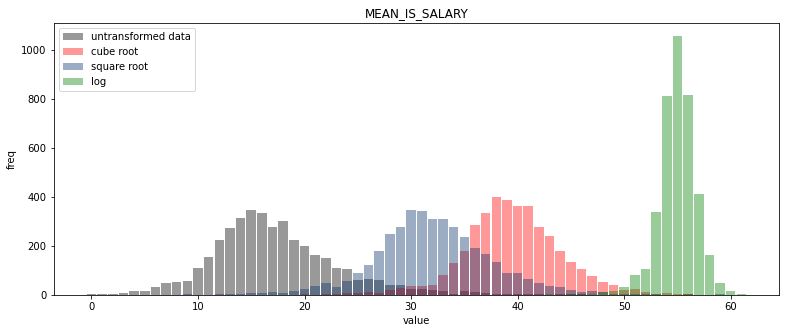

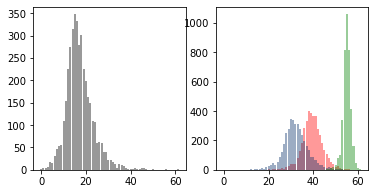

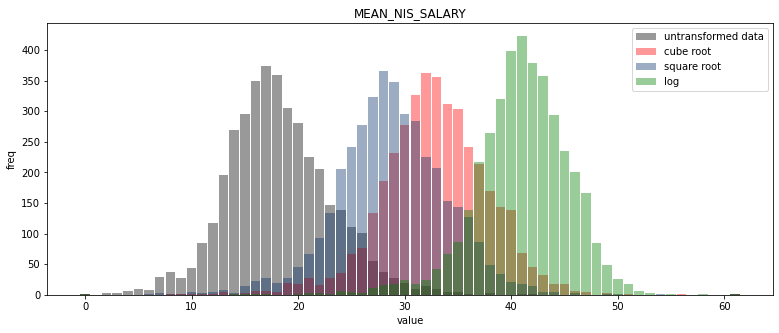

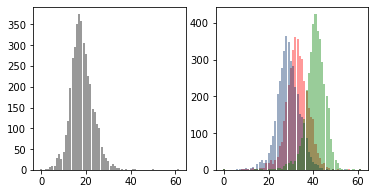

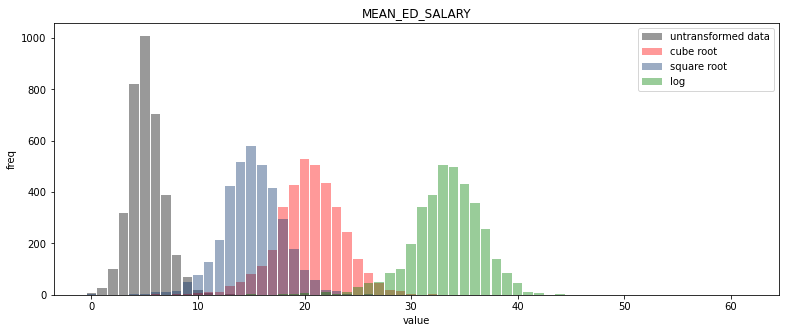

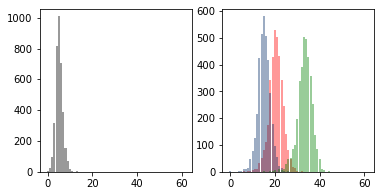

In [7]:

gen_hists(final_data,excluded_cols)

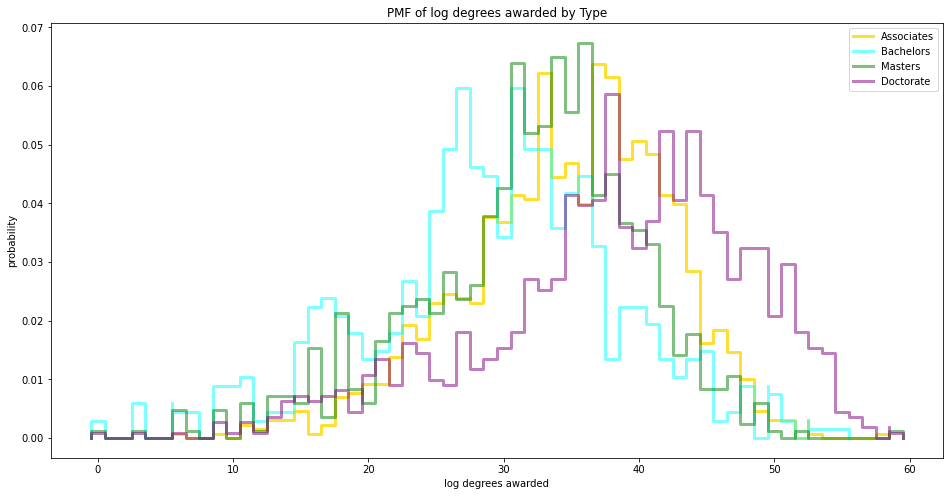

<Figure size 576x432 with 0 Axes>

In [8]:
# Create PMFs

#pmf_assoc = thinkstats2.Pmf(thinkstats2.Hist(np.log(final_data['CSTOTLT']).where(final_data['HDEGOFR1']==40)),label='Associates')
pmf_assoc = thinkstats2.Pmf(thinkstats2.Hist(pd.cut(np.log(final_data['COMPS_TOTAL']),bins=60,labels=False, duplicates='drop').where(final_data['HDEGOFR1']==40)),label='Associates')
pmf_bach = thinkstats2.Pmf(thinkstats2.Hist(pd.cut(np.log(final_data['COMPS_TOTAL']),bins=60,labels=False, duplicates='drop').where(final_data['HDEGOFR1']==30)),label='Bachelors')
pmf_mast = thinkstats2.Pmf(thinkstats2.Hist(pd.cut(np.log(final_data['COMPS_TOTAL']),bins=60,labels=False, duplicates='drop').where(final_data['HDEGOFR1']==20)),label='Masters')
pmf_doc = thinkstats2.Pmf(thinkstats2.Hist(pd.cut(np.log(final_data['COMPS_TOTAL']),bins=60,labels=False, duplicates='drop').where(final_data['HDEGOFR1'].isin([11,12,13,14]))),label='Doctorate')


#thinkplot.PrePlot(4)
plt.figure(figsize=(16,8))
thinkplot.Pmf(pmf_assoc,color='gold',alpha=0.8)
thinkplot.Pmf(pmf_bach,color='cyan',alpha=0.5)
thinkplot.Pmf(pmf_mast,color='green',alpha=0.5)
thinkplot.Pmf(pmf_doc,color='purple',alpha=0.5)
#thinkplot.Pmfs([pmf_assoc,pmf_bach,pmf_mast,pmf_doc],alpha=0.3,linewidth=.3,fillstyle='none',drawstyle='steps')


thinkplot.Show(xlabel='log degrees awarded',ylabel='probability',title='PMF of log degrees awarded by Type')

The PMF indicates that schools that offer doctoral degrees as their highest award tend to have more awards overall. This makes sense if those schools award all the lower degrees as well, which is common. 

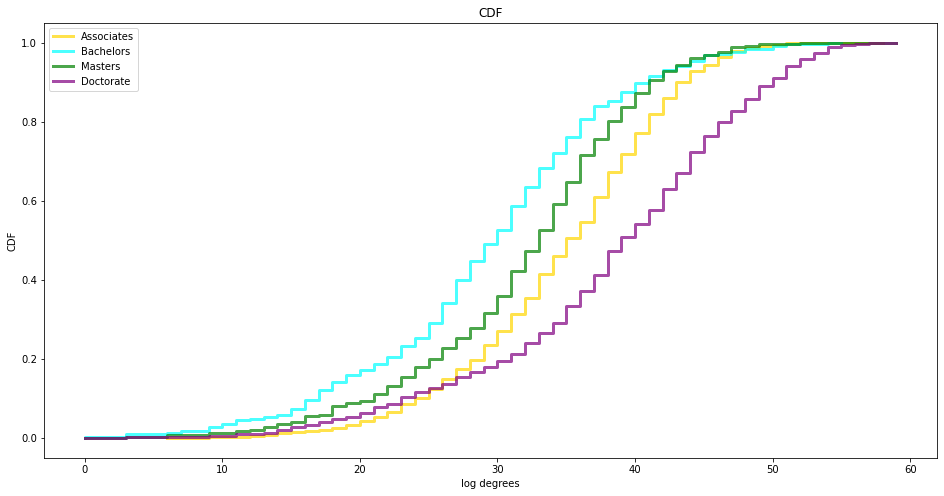

<Figure size 576x432 with 0 Axes>

In [9]:
# Create CDF
cdf_assoc = thinkstats2.MakeCdfFromPmf(pmf_assoc)
cdf_bach = thinkstats2.MakeCdfFromPmf(pmf_bach)
cdf_mast = thinkstats2.MakeCdfFromPmf(pmf_mast)
cdf_doc = thinkstats2.MakeCdfFromPmf(pmf_doc)
plt.figure(figsize=(16,8))
thinkplot.Cdf(cdf_assoc,color='gold')
thinkplot.Cdf(cdf_bach,color='cyan')
thinkplot.Cdf(cdf_mast,color='green')
thinkplot.Cdf(cdf_doc,color='purple')
thinkplot.Show(xlabel='log degrees', ylabel='CDF', title='CDF')




In [10]:
# test from thinkstats
def MakeNormalModel(data):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(data, label='data')

    mean, var = thinkstats2.TrimmedMeanVar(data)
    std = np.sqrt(var)
    print('n, mean, std', len(data), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)


n, mean, std 3929 1068.0766034796156 1616.88233128705


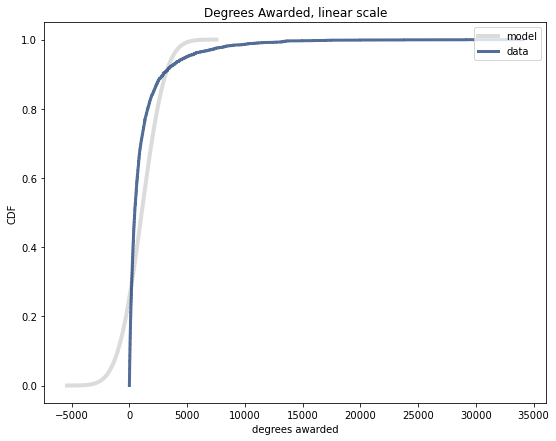

In [11]:
# check data against normal linear model
plt.figure(figsize=(9,7))
MakeNormalModel(final_data['COMPS_TOTAL'])

thinkplot.Config(title='Degrees Awarded, linear scale', xlabel='degrees awarded',
                 ylabel='CDF', loc='upper right')

n, mean, std 3929 6.036180064675259 1.5064903726474779


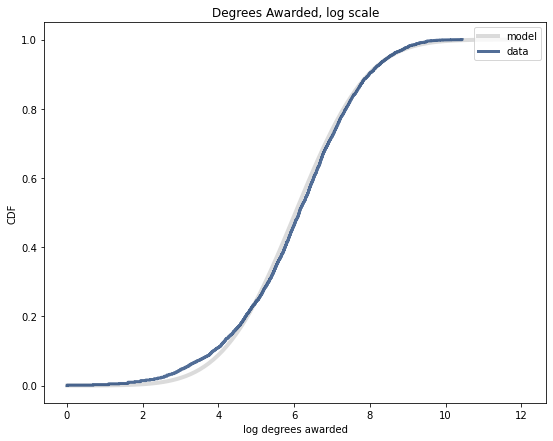

In [12]:
# check data against log model
plt.figure(figsize=(9,7))
log_comps = np.log(final_data['COMPS_TOTAL'])
MakeNormalModel(log_comps)
thinkplot.Config(title='Degrees Awarded, log scale', xlabel='log degrees awarded',
                 ylabel='CDF', loc='upper right')

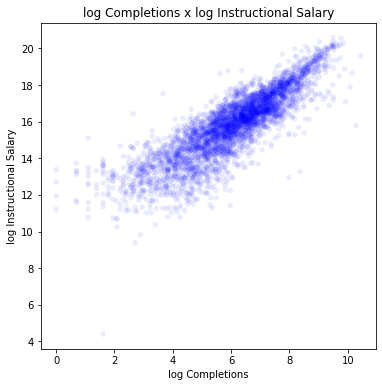

<Figure size 576x432 with 0 Axes>

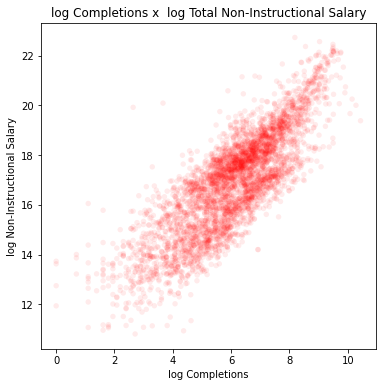

<Figure size 576x432 with 0 Axes>

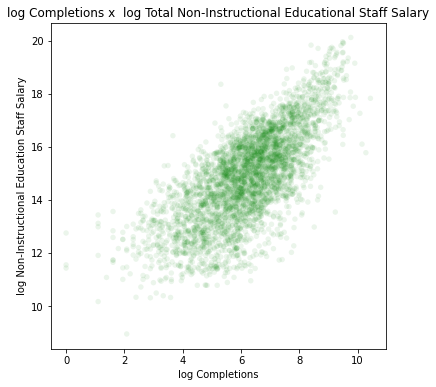

<Figure size 576x432 with 0 Axes>

In [13]:
# scatterplots
numdegs = final_data['COMPS_TOTAL']
logdegs = np.log(numdegs)
is_sal = final_data['IS_SALARY']
log_issal = np.log(is_sal)
nis_sal = final_data['NIS_SALARY']
log_nis_sal = np.log(nis_sal)
nis_ed_sal = final_data['NIS_ED_SALARY']
log_nis_ed_sal = np.log(nis_ed_sal)


# log plots, Salary
plt.figure(figsize=(6,6))
thinkplot.Scatter(logdegs,log_issal,alpha=0.08)
thinkplot.Show(xlabel='log Completions', ylabel = 'log Instructional Salary',title='log Completions x log Instructional Salary')
plt.figure(figsize=(6,6))
thinkplot.Scatter(logdegs,log_nis_sal,alpha=0.08,color='red')
thinkplot.Show(xlabel='log Completions', ylabel = 'log Non-Instructional Salary',title='log Completions x  log Total Non-Instructional Salary')
plt.figure(figsize=(6,6))
thinkplot.Scatter(logdegs,log_nis_ed_sal,alpha=0.08,color='green')
thinkplot.Show(xlabel='log Completions', ylabel = 'log Non-Instructional Education Staff Salary',title='log Completions x  log Total Non-Instructional Educational Staff Salary')


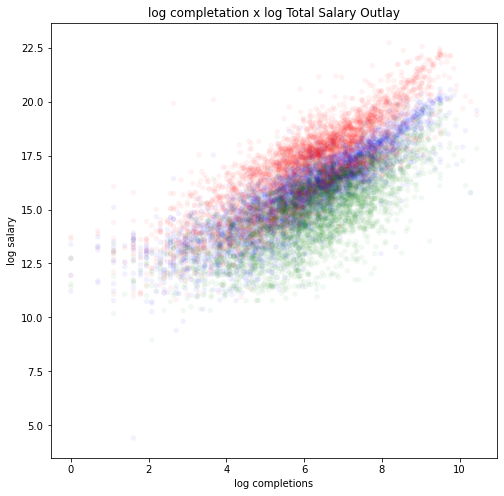

<Figure size 576x432 with 0 Axes>

In [14]:
plt.figure(figsize=(8,8))
thinkplot.Scatter(logdegs,log_issal,alpha=0.05,color='blue')
thinkplot.Scatter(logdegs,log_nis_sal,alpha=0.05,color='red')
thinkplot.Scatter(logdegs,log_nis_ed_sal,alpha=0.05,color='green')
thinkplot.Show(xlabel='log completions', ylabel='log salary',title='log completation x log Total Salary Outlay')

In [15]:
# Correlation test - logStaff Salaries x logCompletions
is_corr = thinkstats2.Corr(logdegs,log_issal)
nis_corr= thinkstats2.Corr(logdegs,log_nis_sal)
ed_corr = thinkstats2.Corr(logdegs,log_nis_ed_sal)
print("Correlation for Instructional Staff Salary and Completions: {0}".format(is_corr))
print("Correlation for Non=Instructional Staff Salary and Completions: {0}".format(nis_corr))
print("Correlation for Educational Support Staff Salary and Completions: {0}".format(ed_corr))

Correlation for Instructional Staff Salary and Completions: nan
Correlation for Non=Instructional Staff Salary and Completions: nan
Correlation for Educational Support Staff Salary and Completions: nan


In [16]:
# Covariance test - logStaff Salaries x logCompletions
is_cov = thinkstats2.Cov(logdegs,log_issal)
nis_cov= thinkstats2.Cov(logdegs,log_nis_sal)
ed_cov = thinkstats2.Cov(logdegs,log_nis_ed_sal)
print("Cov for Instructional Staff Salary and Completions: {0}".format(is_corr))
print("Cov for Non=Instructional Staff Salary and Completions: {0}".format(nis_corr))
print("Cov for Educational Support Staff Salary and Completions: {0}".format(ed_corr))

Cov for Instructional Staff Salary and Completions: nan
Cov for Non=Instructional Staff Salary and Completions: nan
Cov for Educational Support Staff Salary and Completions: nan


In [17]:
# Correlation test - Mean Salaries x logCompletions
is_corr = thinkstats2.Corr(logdegs,final_data['MEAN_IS_SALARY'])
nis_corr= thinkstats2.Corr(logdegs,final_data['MEAN_NIS_SALARY'])
ed_corr = thinkstats2.Corr(logdegs,final_data['MEAN_ED_SALARY'])
print("Correlation for Instructional Staff Salary and Completions: {0}".format(is_corr))
print("Correlation for Non=Instructional Staff Salary and Completions: {0}".format(nis_corr))
print("Correlation for Educational Support Staff Salary and Completions: {0}".format(ed_corr))

Correlation for Instructional Staff Salary and Completions: nan
Correlation for Non=Instructional Staff Salary and Completions: nan
Correlation for Educational Support Staff Salary and Completions: nan


In [18]:
# Covariance test - Mean Salaries x logCompletions
is_cov = thinkstats2.Cov(logdegs,final_data['MEAN_IS_SALARY'])
nis_cov= thinkstats2.Cov(logdegs,final_data['MEAN_NIS_SALARY'])
ed_cov = thinkstats2.Cov(logdegs,final_data['MEAN_ED_SALARY'])
print("Cov for Instructional Staff Salary and Completions: {0}".format(is_corr))
print("Cov for Non=Instructional Staff Salary and Completions: {0}".format(nis_corr))
print("Cov for Educational Support Staff Salary and Completions: {0}".format(ed_corr))

Cov for Instructional Staff Salary and Completions: nan
Cov for Non=Instructional Staff Salary and Completions: nan
Cov for Educational Support Staff Salary and Completions: nan


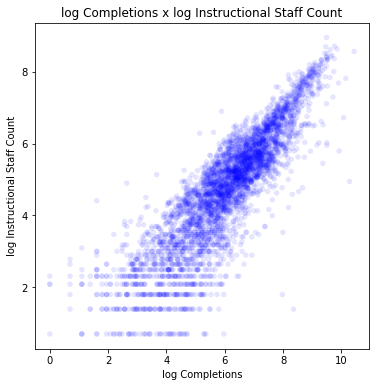

<Figure size 576x432 with 0 Axes>

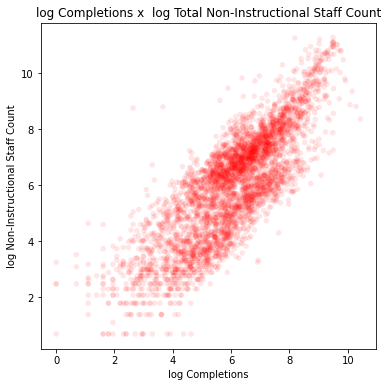

<Figure size 576x432 with 0 Axes>

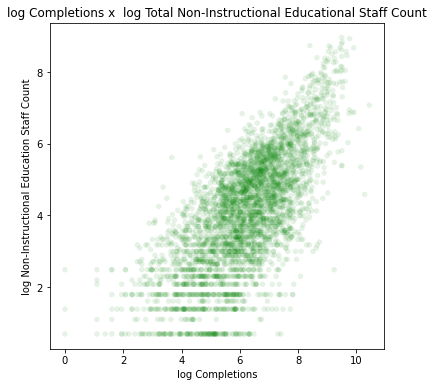

<Figure size 576x432 with 0 Axes>

In [19]:
# make scatter plots
is_tot = final_data['IS_TOTAL']
log_is_tot = np.log(is_tot)
nis_tot = final_data['NIS_TOTAL']
log_nis_tot = np.log(nis_tot)
ed_tot = final_data['NIS_ED_TOTAL']
log_ed_tot = np.log(ed_tot)

plt.figure(figsize=(6,6))
thinkplot.Scatter(logdegs,log_is_tot,alpha=0.1)
thinkplot.Show(xlabel='log Completions', ylabel = 'log Instructional Staff Count',title='log Completions x log Instructional Staff Count')
plt.figure(figsize=(6,6))
thinkplot.Scatter(logdegs,log_nis_tot,alpha=0.1,color='red')
thinkplot.Show(xlabel='log Completions', ylabel = 'log Non-Instructional Staff Count',title='log Completions x  log Total Non-Instructional Staff Count')
plt.figure(figsize=(6,6))
thinkplot.Scatter(logdegs,log_ed_tot,alpha=0.1,color='green')
thinkplot.Show(xlabel='log Completions', ylabel = 'log Non-Instructional Education Staff Count',title='log Completions x  log Total Non-Instructional Educational Staff Count')



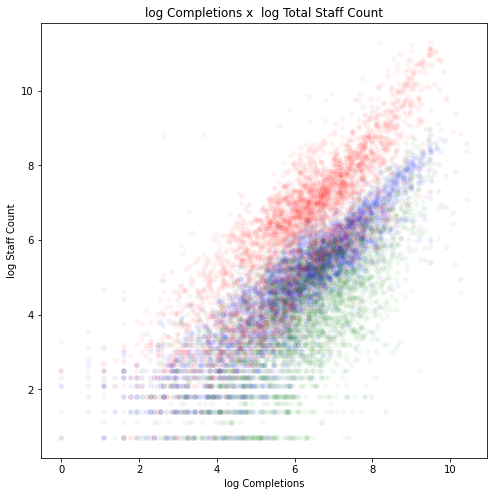

<Figure size 576x432 with 0 Axes>

In [20]:
# combine previous 3 plots
plt.figure(figsize=(8,8))
thinkplot.Scatter(logdegs,log_is_tot,alpha=.05,color='blue')
thinkplot.Scatter(logdegs,log_nis_tot,alpha=.05,color='red')
thinkplot.Scatter(logdegs,log_ed_tot,alpha=.05,color='green')
thinkplot.Show(xlabel='log Completions', ylabel = 'log Staff Count',title='log Completions x  log Total Staff Count')


In [21]:
# Correlation test - logStaff Count x logCompletions
ist_corr = thinkstats2.Corr(logdegs,log_is_tot)
nist_corr= thinkstats2.Corr(logdegs,log_nis_tot)
edt_corr = thinkstats2.Corr(logdegs,log_ed_tot)

print("Correlation for Instructional Staff Count and Completions: {0}".format(ist_corr))
print("Correlation for Non=Instructional Staff Count and Completions: {0}".format(nist_corr))
print("Correlation for Educational Support Staff Count and Completions: {0}".format(edt_corr))

Correlation for Instructional Staff Count and Completions: 0.8655697651126326
Correlation for Non=Instructional Staff Count and Completions: nan
Correlation for Educational Support Staff Count and Completions: nan


In [22]:
# test covariance
ist_cov = thinkstats2.Cov(logdegs,log_is_tot)
nist_cov= thinkstats2.Cov(logdegs,log_nis_tot)
edt_cov = thinkstats2.Cov(logdegs,log_ed_tot)
print("Cov for Instructional Staff Count and Completions: {0}".format(ist_corr))
print("Cov for Non=Instructional Staff Count and Completions: {0}".format(nist_corr))
print("Cov for Educational Support Staff Count and Completions: {0}".format(edt_corr))

Cov for Instructional Staff Count and Completions: 0.8655697651126326
Cov for Non=Instructional Staff Count and Completions: nan
Cov for Educational Support Staff Count and Completions: nan


In [23]:
# test from thinkstats
class LognormalCorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = (data)
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys


data = logdegs,log_is_tot
ht = LognormalCorrelationPermute(data)

pval = ht.PValue()
print(pval)
ht.actual, ht.MaxTestStat()

0.0


(0.8655697651126326, 0.04607579090105502)

In [24]:
# test from thinkstats
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = (data)
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

dataDMP = logdegs,log_is_tot
plt.figure(figsize=(9,9))
ht=DiffMeansPermute(dataDMP)
print(ht.PValue())
print(ht.actual, ht.MaxTestStat())


0.0
1.316431385767003 0.12228750299638591


<Figure size 648x648 with 0 Axes>

In [25]:
# test from thinkstats
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat
ht=DiffMeansOneSided(data)
print(ht.PValue())
print(ht.actual,ht.MaxTestStat())

0.0
1.316431385767003 0.11452819026627559


In [26]:
# test from thinkstats
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat
ht=DiffStdPermute(data)
print(ht.PValue())


0.352


In [27]:
# test from thinkstats
def FalseNegRate(data, num_runs=1000):
    """Computes the chance of a false negative based on resampling.

    data: pair of sequences
    num_runs: how many experiments to simulate

    returns: float false negative rate
    """
    group1, group2 = data
    count = 0

    for i in range(num_runs):
        sample1 = thinkstats2.Resample(group1)
        sample2 = thinkstats2.Resample(group2)
        ht = DiffMeansPermute((sample1, sample2))
        p_value = ht.PValue(iters=101)
        if p_value > 0.05:
            count += 1

    return count / num_runs
negrate = FalseNegRate(data)
negrate

0.0

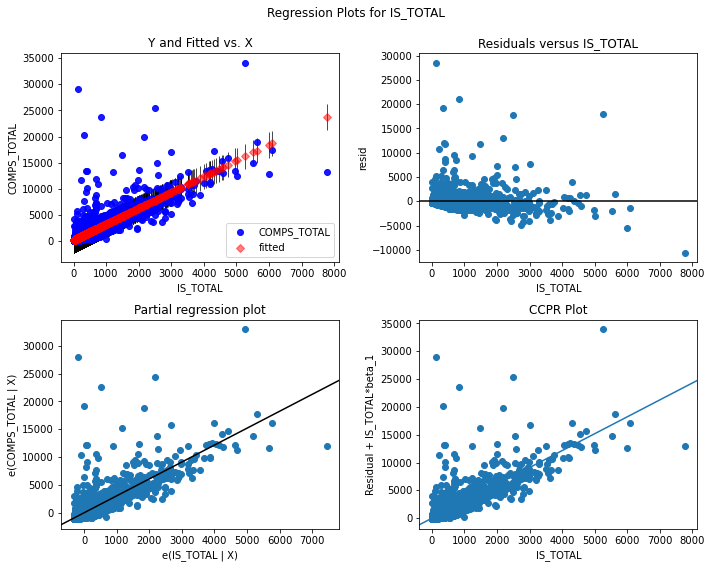

In [28]:
# base model- original data / total instructional staff count
formula1 = 'COMPS_TOTAL~IS_TOTAL'
model1 = smf.ols(formula1, data=final_data)
results1 = model1.fit()
results1.summary()
# residual plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(results1, 'IS_TOTAL', fig=fig)

                             OLS Regression Results                            
Dep. Variable:     np.log(COMPS_TOTAL)   R-squared:                       0.749
Model:                             OLS   Adj. R-squared:                  0.749
Method:                  Least Squares   F-statistic:                 1.173e+04
Date:                 Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                         23:54:14   Log-Likelihood:                -4726.9
No. Observations:                 3929   AIC:                             9458.
Df Residuals:                     3927   BIC:                             9470.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9212   

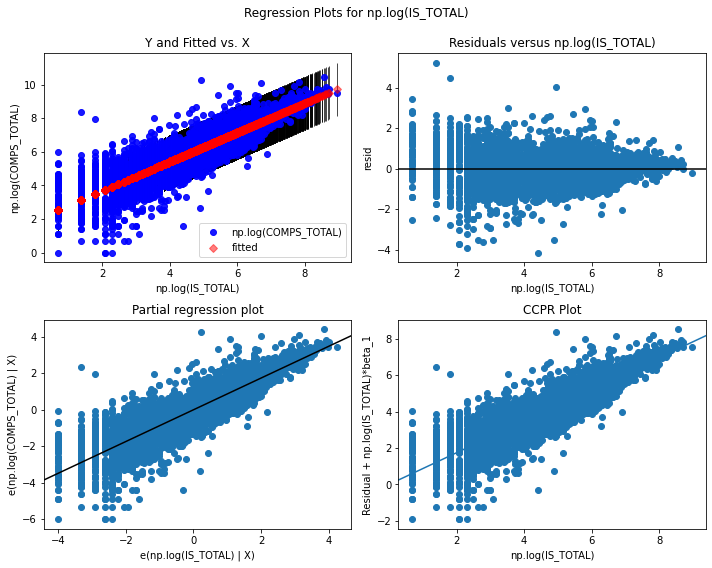

In [37]:
# Run regression on log transformed data
formula2 = 'np.log(COMPS_TOTAL)~np.log(IS_TOTAL)'
model2 = smf.ols(formula2, data=(final_data))
results2 = model2.fit()
print(results2.summary())
# residual plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(results2, 'np.log(IS_TOTAL)', fig=fig)

In [36]:
# model including total counts for Instructional/Non-Instructional/Non-Instructional Ed Support Staffs
formula3 = 'COMPS_TOTAL~IS_TOTAL+NIS_TOTAL+NIS_ED_TOTAL'
model3 = smf.ols(formula3, data=np.log(final_data))
results3 = model3.fit()
results3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            COMPS_TOTAL   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     3684.
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:54:06   Log-Likelihood:                -4055.5
No. Observations:                3622   AIC:                             8119.
Df Residuals:                    3618   BIC:                             8144.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0400      0.046     43.971      0.000       1.949       2.131
IS_TOTAL         0.8522      0.021     41.133      0.000       0.812       0.893
NIS_TOTAL       -0.0609      0.021     -2.873      0.004      -0.102      -0.019
NIS_ED_TOTAL     0.0903      0.015      6.146      0.000       0.061       0.119
==============================================================================
Omnibus:                      194.354   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.099
Skew:                           0.083   Prob(JB):                    5.29e-161
Kurtosis:                       5.205   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# model including Salary outlays for Instructional/Non-Instructional/Non-Instructional Ed Support Staffs
formula4 = 'COMPS_TOTAL~IS_SALARY+NIS_SALARY+NIS_ED_SALARY'
model4 = smf.ols(formula4, data=np.log(final_data))
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            COMPS_TOTAL   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3349.
Date:                Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:53:06   Log-Likelihood:                -4183.9
No. Observations:                3622   AIC:                             8376.
Df Residuals:                    3618   BIC:                             8401.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.9908      0.123    -48.600      0.000      -6.232      -5.749
IS_SALARY         0.7184      0.021     34.749      0.000       0.678       0.759
NIS_SALARY       -0.0220      0.023     -0.977      0.329      -0.066       0.022
NIS_ED_SALARY     0.0724      0.015      4.814      0.000       0.043       0.102
==============================================================================
Omnibus:                      145.392   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.303
Skew:                          -0.133   Prob(JB):                     4.86e-90
Kurtosis:                       4.629   Cond. No.                         270.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Run kitchen sink regression - all variables
formula5 = 'np.log(COMPS_TOTAL)~np.log(IS_TOTAL)+np.log(IS_SALARY)+np.log(NIS_TOTAL)+np.log(NIS_SALARY)+HDEGOFR1+OBEREG'
model5 = smf.ols(formula5, data=(final_data))
results5 = model5.fit()
results5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(COMPS_TOTAL)   R-squared:                       0.806
Model:                             OLS   Adj. R-squared:                  0.805
Method:                  Least Squares   F-statistic:                     896.2
Date:                 Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                         23:53:56   Log-Likelihood:                -4161.2
No. Observations:                 3907   AIC:                             8360.
Df Residuals:                     3888   BIC:                             8480.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.7715      0.603     -7.907      0.000      -5.955      -3.588
HDEGOFR1[T.12]        -0.0157      0.054     -0.292      0.771      -0.121       0.090
HDEGOFR1[T.13]        -0.1581      0.055     -2.868      0.004      -0.266      -0.050
HDEGOFR1[T.14]        -0.3254      0.094     -3.450      0.001      -0.510      -0.140
HDEGOFR1[T.20]        -0.1196      0.046     -2.617      0.009      -0.209      -0.030
HDEGOFR1[T.30]        -0.1377      0.050     -2.773      0.006      -0.235      -0.040
HDEGOFR1[T.40]         0.5754      0.047     12.339      0.000       0.484       0.667
OBEREG[T.2]            0.0170      0.055      0.309      0.757      -0.091       0.125
OBEREG[T.3]            0.1493      0.056      2.645      0.008       0.039       0.260
OBEREG[T.4]            0.1723      0.061      2.839      0.005       0.053       0.291
OBEREG[T.5]            0.2813      0.054      5.209      0.000       0.175       0.387
OBEREG[T.6]            0.3325      0.061      5.475      0.000       0.213       0.452
OBEREG[T.7]            0.2721      0.077      3.534      0.000       0.121       0.423
OBEREG[T.8]            0.4030      0.056      7.177      0.000       0.293       0.513
OBEREG[T.9]            0.6474      0.097      6.651      0.000       0.457       0.838
np.log(IS_TOTAL)       0.7714      0.055     14.094      0.000       0.664       0.879
np.log(IS_SALARY)     -0.2067      0.051     -4.032      0.000      -0.307      -0.106
np.log(NIS_TOTAL)     -0.4880      0.067     -7.232      0.000      -0.620      -0.356
np.log(NIS_SALARY)     0.7709      0.067     11.519      0.000       0.640       0.902
==============================================================================
Omnibus:                      247.938   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1135.756
Skew:                          -0.035   Prob(JB):                    2.36e-247
Kurtosis:                       5.640   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Run hand-picked variables to maximize R²
formula6 = 'np.log(COMPS_TOTAL)~np.log(IS_TOTAL)+np.log(IS_SALARY)+np.log(NIS_SALARY)+HDEGOFR1+OBEREG'
model6 = smf.ols(formula6, data=(final_data))
results6 = model6.fit()
results6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(COMPS_TOTAL)   R-squared:                       0.803
Model:                             OLS   Adj. R-squared:                  0.802
Method:                  Least Squares   F-statistic:                     933.5
Date:                 Wed, 03 Mar 2021   Prob (F-statistic):               0.00
Time:                         23:54:23   Log-Likelihood:                -4187.3
No. Observations:                 3907   AIC:                             8411.
Df Residuals:                     3889   BIC:                             8524.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.8923      0.456     -4.146      0.000      -2.787      -0.997
HDEGOFR1[T.12]        -0.0048      0.054     -0.088      0.930      -0.111       0.101
HDEGOFR1[T.13]        -0.1527      0.055     -2.753      0.006      -0.262      -0.044
HDEGOFR1[T.14]        -0.3131      0.095     -3.298      0.001      -0.499      -0.127
HDEGOFR1[T.20]        -0.1126      0.046     -2.449      0.014      -0.203      -0.022
HDEGOFR1[T.30]        -0.1305      0.050     -2.611      0.009      -0.228      -0.033
HDEGOFR1[T.40]         0.6140      0.047     13.168      0.000       0.523       0.705
OBEREG[T.2]           -0.0130      0.055     -0.236      0.814      -0.121       0.095
OBEREG[T.3]            0.1112      0.057      1.966      0.049       0.000       0.222
OBEREG[T.4]            0.1175      0.061      1.938      0.053      -0.001       0.236
OBEREG[T.5]            0.2190      0.054      4.081      0.000       0.114       0.324
OBEREG[T.6]            0.2699      0.060      4.462      0.000       0.151       0.389
OBEREG[T.7]            0.2435      0.077      3.146      0.002       0.092       0.395
OBEREG[T.8]            0.4085      0.057      7.226      0.000       0.298       0.519
OBEREG[T.9]            0.4263      0.093      4.584      0.000       0.244       0.609
np.log(IS_TOTAL)       0.5426      0.045     12.069      0.000       0.454       0.631
np.log(IS_SALARY)     -0.0040      0.043     -0.093      0.926      -0.089       0.081
np.log(NIS_SALARY)     0.3028      0.017     17.700      0.000       0.269       0.336
==============================================================================
Omnibus:                      235.244   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1025.933
Skew:                          -0.029   Prob(JB):                    1.66e-223
Kurtosis:                       5.510   Cond. No.                         973.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# base model- original data / total instructional staff count
formulax = 'COMPS_TOTAL ~MEAN_IS_SALARY+MEAN_NIS_SALARY+MEAN_ED_SALARY'
modelx = smf.ols(formulax, data=(np.log(final_data)))
resultsx = modelx.fit()
print(resultsx.summary())
# residual plots
fig = plt.figure(figsize=(10,8))


                            OLS Regression Results                            
Dep. Variable:            COMPS_TOTAL   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     293.9
Date:                Wed, 03 Mar 2021   Prob (F-statistic):          9.50e-171
Time:                        23:53:12   Log-Likelihood:                -6195.7
No. Observations:                3622   AIC:                         1.240e+04
Df Residuals:                    3618   BIC:                         1.242e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.3361      0.987    -

<Figure size 720x576 with 0 Axes>